In [2]:
# General purpose
import os
# Data manipulation
import pandas as pd
# Tensor manipulation
import numpy as np
# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

## 1. Pose questions
* Is there correlation between age and survival?
* Does the passenger class affect the survival?
... 

## 2. Data wrangling
### 2.1 Get the data

In [3]:
df = pd.read_csv("data/train.csv") #pd.read_excel
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Clean your data

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_copy = df.drop(["PassengerId", "Name", "Parch", "SibSp", "Embarked", "Cabin"],\
             axis = 1)

In [6]:
df_copy.head()

,Survived,Pclass,Sex,Age,Ticket,Fare
0,0,3,male,22.0,A/5 21171,7.2500
1,1,1,female,38.0,PC 17599,71.2833
2,1,3,female,26.0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,113803,53.1000
4,0,3,male,35.0,373450,8.0500


In [7]:
# Outliers
df_copy.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [8]:
# Check for outliers
list_missing_values = []
for each in df_copy.columns:
    list_missing_values.append((each, df_copy[each].isnull().sum()))
print(list_missing_values)

[('Survived', 0), ('Pclass', 0), ('Sex', 0), ('Age', 177), ('Ticket', 0), ('Fare', 0)]


In [9]:
# Fill data
print(df_copy["Age"].mean())
df_copy["Age"] = df_copy["Age"].fillna(29.69)

29.69911764705882


In [10]:
df_copy.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.697306,32.204208
std,0.486592,0.836071,13.002016,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.690000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


## 3. Exploratory data analysis

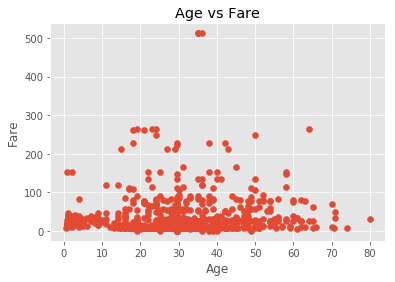

In [11]:
# Visualizations
x_ = "Age"
y_ = "Fare"
plt.scatter(df_copy[x_], df_copy[y_])
plt.title("{} vs {}".format(x_, y_))
plt.xlabel(x_)
plt.ylabel(y_)
plt.show()

## Conclusions
Apply Machine Learning to predict survival rate

In [19]:
# Give format to tables
x = df_copy.drop(["Ticket", "Survived"], axis = 1)
y = df_copy["Survived"]

In [20]:
# Fix the sex categorical value
x = pd.get_dummies(x)

In [21]:
# Give format for sklearn
x = np.array(x)
y = np.array(y)

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [24]:
# Get the score for the training set
score = clf.score(x, y)
print("Score in training set: {}".format(score))

Score in training set: 0.9797979797979798


### Submission

In [49]:
# Read test set
df_test_set = pd.read_csv("data/test.csv")
df_test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
# The table has all the variables, we don't need all of them because we 
# only used a few for our model
# Let's clean the variables we don't use
df_test_set = df_test_set.drop(["Ticket", "Name", "Parch", "SibSp", "Embarked", "Cabin"],\
                             axis = 1)

In [55]:
# Clean the data
# For the age's values
mean_value_age = df_test_set["Age"].mean()
df_test_set["Age"] = df_test_set["Age"].fillna(mean_value_age)

# For the fare's values
mean_value_fare = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean_value_fare)

In [56]:
# Let's give format to our data
df_test_set = pd.get_dummies(df_test_set)
df_test_set.head()

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male
0,892,3,34.5,7.8292,0,1
1,893,3,47.0,7.0000,1,0
2,894,2,62.0,9.6875,0,1
3,895,3,27.0,8.6625,0,1
4,896,3,22.0,12.2875,1,0


In [57]:
# Open a file
submission_file = open("data/send_kaggle_file.csv", "w")
submission_file.write("PassengerId,Survived\n")

# Now we can predict our test set
for i in range(df_test_set.shape[0]):
    # Let's locate one example
    example_test_set = df_test_set.drop(["PassengerId"], axis = 1).iloc[i]
    example_test_set_for_sklearn = np.array(example_test_set).reshape(1, -1)
    # Let's use the Machine Learning model
    classification_example_test_set = clf.predict(example_test_set_for_sklearn)
    print("**For the data \n{}, \n*we predict {}\n".format(example_test_set, classification_example_test_set))
    # Write the output file
    submission_file.write(str(df_test_set["PassengerId"].iloc[i]) \
                          + "," + str(np.squeeze(classification_example_test_set)) + "\n")
# Close the output file   
submission_file.close()

**For the data 
Pclass         3.0000
Age           34.5000
Fare           7.8292
Sex_female     0.0000
Sex_male       1.0000
Name: 0, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.0
Age           47.0
Fare           7.0
Sex_female     1.0
Sex_male       0.0
Name: 1, dtype: float64, 
we predict [0]

**For the data 
Pclass         2.0000
Age           62.0000
Fare           9.6875
Sex_female     0.0000
Sex_male       1.0000
Name: 2, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.0000
Age           27.0000
Fare           8.6625
Sex_female     0.0000
Sex_male       1.0000
Name: 3, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.0000
Age           22.0000
Fare          12.2875
Sex_female     1.0000
Sex_male       0.0000
Name: 4, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.000
Age           14.000
Fare           9.225
Sex_female     0.000
Sex_male       1.000
Name: 5, dtype: float64, 
we predict [0]

**For the da

**For the data 
Pclass          1.0
Age            60.0
Fare          263.0
Sex_female      1.0
Sex_male        0.0
Name: 69, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.00
Age           24.00
Fare           7.75
Sex_female     1.00
Sex_male       0.00
Name: 70, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.0000
Age           21.0000
Fare           7.8958
Sex_female     0.0000
Sex_male       1.0000
Name: 71, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.000
Age           29.000
Fare           7.925
Sex_female     1.000
Sex_male       0.000
Name: 72, dtype: float64, 
we predict [1]

**For the data 
Pclass         1.0000
Age           28.5000
Fare          27.7208
Sex_female     0.0000
Sex_male       1.0000
Name: 73, dtype: float64, 
we predict [0]

**For the data 
Pclass          1.0
Age            35.0
Fare          211.5
Sex_female      1.0
Sex_male        0.0
Name: 74, dtype: float64, 
we predict [1]

**For the data 
Pclas

**For the data 
Pclass         3.0
Age           40.0
Fare          46.9
Sex_female     0.0
Sex_male       1.0
Name: 139, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.0
Age           10.0
Fare          46.9
Sex_female     1.0
Sex_male       0.0
Name: 140, dtype: float64, 
we predict [0]

**For the data 
Pclass          1.00
Age            33.00
Fare          151.55
Sex_female      1.00
Sex_male        0.00
Name: 141, dtype: float64, 
we predict [0]

**For the data 
Pclass          1.000
Age            61.000
Fare          262.375
Sex_female      0.000
Sex_male        1.000
Name: 142, dtype: float64, 
we predict [0]

**For the data 
Pclass         2.0
Age           28.0
Fare          26.0
Sex_female     0.0
Sex_male       1.0
Name: 143, dtype: float64, 
we predict [0]

**For the data 
Pclass         1.00
Age           42.00
Fare          26.55
Sex_female     0.00
Sex_male       1.00
Name: 144, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.0
Age  

**For the data 
Pclass         2.0
Age           24.0
Fare          65.0
Sex_female     1.0
Sex_male       0.0
Name: 385, dtype: float64, 
we predict [1]

**For the data 
Pclass         3.000
Age           24.000
Fare           7.775
Sex_female     0.000
Sex_male       1.000
Name: 386, dtype: float64, 
we predict [0]

**For the data 
Pclass         2.0
Age           57.0
Fare          13.0
Sex_female     0.0
Sex_male       1.0
Name: 387, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.00
Age           21.00
Fare           7.75
Sex_female     0.00
Sex_male       1.00
Name: 388, dtype: float64, 
we predict [0]

**For the data 
Pclass         3.000
Age            6.000
Fare          21.075
Sex_female     0.000
Sex_male       1.000
Name: 389, dtype: float64, 
we predict [0]

**For the data 
Pclass         1.0
Age           23.0
Fare          93.5
Sex_female     0.0
Sex_male       1.0
Name: 390, dtype: float64, 
we predict [1]

**For the data 
Pclass         1.0
Age       